# Data Gathering - Poll data

In [36]:
import gepd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 15)
import seaborn as sns
import matplotlib.pyplot as plt

## Getting Data

In [37]:
data = gepd.gepd()

In [38]:
df = data.get_surveys()

## Transforming collum names

In [39]:
parties_dict = data.get_parties()

In [40]:
def parties_dict_short_function(parties_dict):
    dct = {}
    for key, value in parties_dict.items():
        dct[key] = value["Shortcut"]
    return dct

In [41]:
parties_dict_short  = parties_dict_short_function(parties_dict)


In [42]:
parties_dict_short

{'7': 'AfD',
 '11': 'BP',
 '14': 'BVB/FW',
 '4': 'Grüne',
 '16': 'BIW',
 '1': 'CDU/CSU',
 '101': 'CDU',
 '102': 'CSU',
 '5': 'Linke',
 '13': 'Die PARTEI',
 '3': 'FDP',
 '8': 'Freie Wähler',
 '9': 'NPD',
 '15': 'Tierschutzpartei',
 '6': 'Piraten',
 '2': 'SPD',
 '10': 'SSW',
 '0': 'Sonstige'}

In [43]:
df = df.rename(columns=parties_dict_short)

In [44]:
df

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,SPD,CDU/CSU,Grüne,FDP,AfD,Sonstige,Linke,CDU,Freie Wähler,CSU,BP,Die PARTEI,SSW,BVB/FW,NPD,Piraten,BIW,Tierschutzpartei
0,2021-08-24,2504,0,2,63,2021-08-17,2021-08-23,23.0,22.0,18.0,12.0,10.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-23,2119,0,5,4,2021-08-20,2021-08-23,23.0,23.0,17.0,13.0,11.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-22,1352,0,5,3,2021-08-16,2021-08-20,22.0,22.0,17.0,13.0,12.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-20,1179,13,1,30,2021-08-13,2021-08-18,11.0,NaN,7.0,6.0,21.0,6.0,10.0,35.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-19,1219,0,1,1,2021-08-17,2021-08-18,21.0,23.0,17.0,13.0,11.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,2017-01-25,2504,0,2,2,2017-01-16,2017-01-20,21.0,37.0,10.0,6.0,12.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,2017-01-24,5028,0,16,14,2017-01-12,2017-01-23,20.4,37.1,9.3,6.2,13.2,4.3,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,2017-01-24,1992,0,5,4,2017-01-20,2017-01-23,21.0,32.5,8.5,7.5,14.5,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1737,2017-01-22,2805,0,3,3,2017-01-12,2017-01-18,21.0,36.0,9.0,6.0,12.0,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Date to 120 days

In [45]:
df["Date"] =  pd.to_datetime(df["Date"], format= "Y-M-D")

In [46]:
start_date = "2021-04-24"
end_date = "2021-08-24"

In [47]:
df_dated = df.loc[(df['Date'] > start_date) & (df['Date'] <= end_date)]

## Eliminating useless collumns

In [48]:
df_dated = df_dated.fillna(0)

In [49]:
other_parties = ["Sonstige", "CDU", "Freie Wähler", "CSU", "BP","Die PARTEI", "SSW", "BVB/FW", "NPD", "Piraten",\
                    "BIW", "Tierschutzpartei"]

In [50]:
df_dated["other"] =  df_dated[other_parties].sum(axis=1)

In [51]:
df_dated

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,SPD,CDU/CSU,Grüne,FDP,AfD,Sonstige,Linke,CDU,Freie Wähler,CSU,BP,Die PARTEI,SSW,BVB/FW,NPD,Piraten,BIW,Tierschutzpartei,other
0,2021-08-24,2504,0,2,63,2021-08-17,2021-08-23,23.0,22.0,18.0,12.0,10.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,2021-08-23,2119,0,5,4,2021-08-20,2021-08-23,23.0,23.0,17.0,13.0,11.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,2021-08-22,1352,0,5,3,2021-08-16,2021-08-20,22.0,22.0,17.0,13.0,12.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,2021-08-20,1179,13,1,30,2021-08-13,2021-08-18,11.0,0.0,7.0,6.0,21.0,6.0,10.0,35.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
4,2021-08-19,1219,0,1,1,2021-08-17,2021-08-18,21.0,23.0,17.0,13.0,11.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2021-04-28,1400,2,5,4,2021-04-22,2021-04-27,9.0,0.0,24.0,7.0,9.0,3.0,3.0,0.0,9.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
153,2021-04-28,2507,0,2,63,2021-04-20,2021-04-26,13.0,22.0,28.0,12.0,11.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
154,2021-04-27,2082,0,5,4,2021-04-23,2021-04-26,16.0,23.0,23.0,12.0,12.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
155,2021-04-26,10039,0,16,14,2021-04-19,2021-04-26,15.0,24.0,29.0,11.0,9.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [52]:
df_dated = df_dated.drop( columns = other_parties ).drop( columns = ["Parliament_ID","Institute_ID", "Tasker_ID"] )


### Removing repeated dates with mean

In [53]:
df_dated_grouped = df_dated.groupby(by = "Date").mean()

In [54]:
pd.date_range(start = start_date, end = end_date ).difference(df_dated.Date).value_counts().sum()

32

In [55]:
## we have 37 missing values

### Adding missing dates

In [56]:
correct_dates = pd.DataFrame(pd.date_range(start = start_date, end = end_date ))

In [57]:
correct_dates

,0
0,2021-04-24
1,2021-04-25
2,2021-04-26
3,2021-04-27
4,2021-04-28
...,...
118,2021-08-20
119,2021-08-21
120,2021-08-22
121,2021-08-23


In [58]:
df_dated = correct_dates.merge(df_dated_grouped, how = "left", left_on= 0 , right_on = ["Date" ])

In [59]:
df_dated = df_dated.set_index([0])

In [60]:
df_dated = df_dated.where(df_dated.notnull() , other=(df_dated.fillna(method='ffill')\
                                                           + df_dated.fillna(method='bfill'))/2)


In [61]:
df_dated.isna().value_counts()

Surveyed_Persons  SPD    CDU/CSU  Grüne  FDP    AfD    Linke  other
False             False  False    False  False  False  False  False    122
True              True   True     True   True   True   True   True       1
dtype: int64

### Removing first two and last two values

In [62]:
df_final =  df_dated.iloc[2:-2].round(2)


In [63]:
df_final

,Surveyed_Persons,SPD,CDU/CSU,Grüne,FDP,AfD,Linke,other
0,,,,,,,,
2021-04-26,10039.00,15.00,24.00,29.00,11.00,9.00,6.00,6.00
2021-04-27,2082.00,16.00,23.00,23.00,12.00,12.00,8.00,6.00
2021-04-28,1689.67,13.00,7.33,26.33,8.67,9.67,8.00,27.00
2021-04-29,1042.00,10.00,0.00,12.00,6.00,24.00,13.00,35.00
2021-04-30,1643.00,14.00,24.00,25.00,11.00,11.00,8.00,7.00
...,...,...,...,...,...,...,...,...
2021-08-18,4874.33,20.67,23.00,18.83,11.67,10.67,6.67,8.50
2021-08-19,1385.67,20.50,24.17,17.83,12.00,11.00,7.17,7.33
2021-08-20,1179.00,11.00,0.00,7.00,6.00,21.00,10.00,45.00


In [64]:
df_final.index.name = 'Date'

In [65]:
df_final["Surveyed_Persons"] = df_final["Surveyed_Persons"].astype(int)

In [66]:
df_final =df_final.round(2)

In [68]:
df_final.to_csv("pools_data_2021.csv")

### Plotting

In [66]:
parties = ["CDU/CSU",  "Grüne", "FDP", "AfD","Linke" ]

<AxesSubplot:xlabel='Date'>

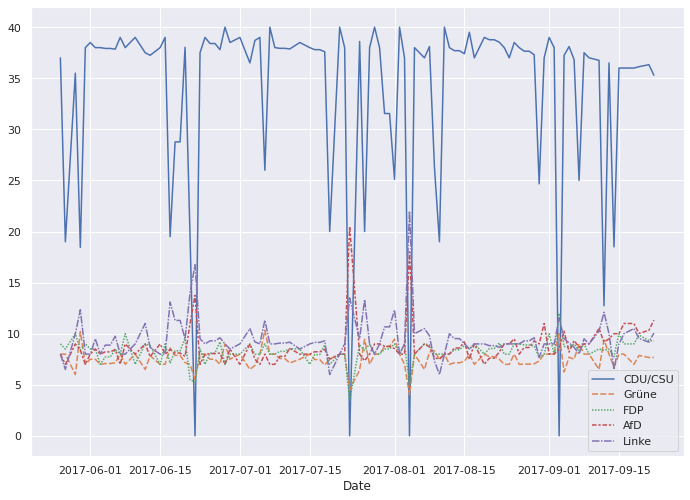

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_final[parties])
